/tmp/ipython-input-960008337.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2020-01-01", periods=24, freq="M")


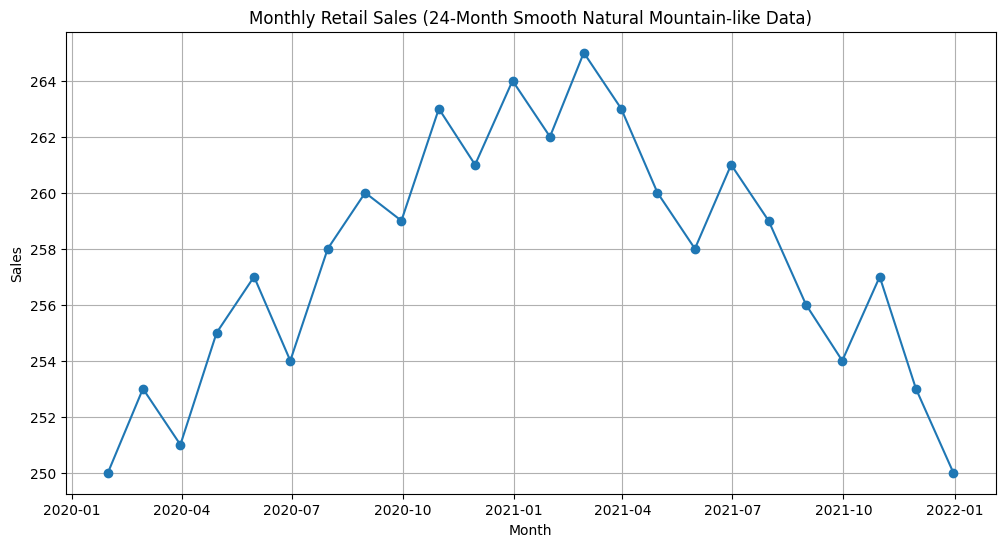

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 24-month smooth, natural mountain-like sales data
sales_values = [
    250, 253, 251, 255, 257, 254, 258, 260, 259, 263, 261, 264,
    262, 265, 263, 260, 258, 261, 259, 256, 254, 257, 253, 250
]

months = pd.date_range(start="2020-01-01", periods=24, freq="M")
df = pd.DataFrame({"Month": months, "Sales": sales_values})
df.set_index("Month", inplace=True)

# Plot the data
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Sales"], marker="o", linestyle='-')
plt.title("Monthly Retail Sales (24-Month Smooth Natural Mountain-like Data)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


Forecasted Sales (MA1):
[np.float64(250.0), np.float64(250.0), np.float64(250.0), np.float64(250.0), np.float64(250.0), np.float64(250.0)]


/tmp/ipython-input-864375764.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(df.index[-1] + pd.offsets.MonthBegin(1), periods=6, freq="M")


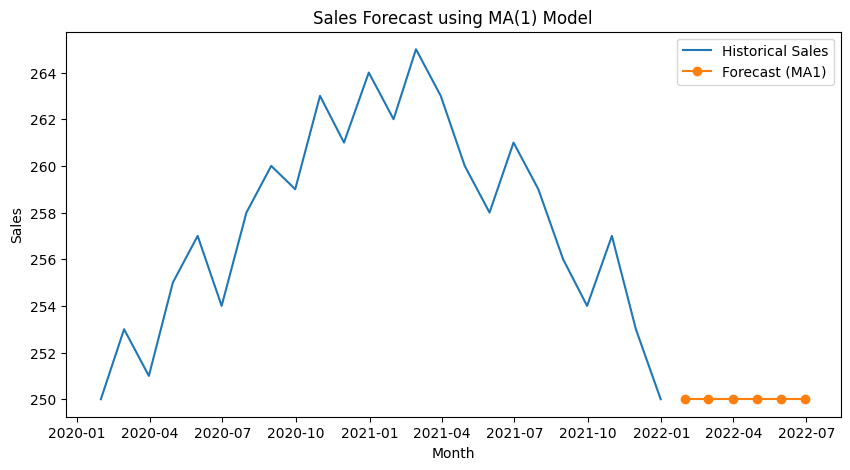

In [58]:
# Step 2: Manual MA(1) Forecast
ma1_forecast = []
window = 1
data = df["Sales"].values.copy()  # keep original data

for i in range(6):  # forecast next 6 months
    ma1_forecast.append(data[-window:].mean())
    data = np.append(data, ma1_forecast[-1])  # append forecast for next iteration

print("Forecasted Sales (MA1):")
print(ma1_forecast)

# Plot MA1 forecast
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Sales"], label="Historical Sales")
future_months = pd.date_range(df.index[-1] + pd.offsets.MonthBegin(1), periods=6, freq="M")
plt.plot(future_months, ma1_forecast, label="Forecast (MA1)", marker="o")
plt.title("Sales Forecast using MA(1) Model")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


Forecasted Sales (MA2):
[np.float64(251.5), np.float64(250.75), np.float64(251.125), np.float64(250.9375), np.float64(251.03125), np.float64(250.984375)]


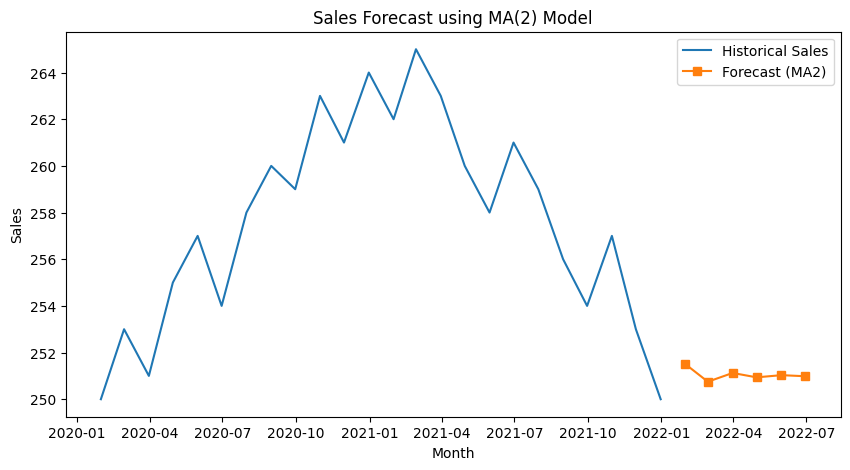

In [59]:
# Step 3: Manual MA(2) Forecast
ma2_forecast = []
window = 2
data = df["Sales"].values.copy()

for i in range(6):  # forecast next 6 months
    ma2_forecast.append(data[-window:].mean())
    data = np.append(data, ma2_forecast[-1])  # append forecast for next iteration

print("Forecasted Sales (MA2):")
print(ma2_forecast)

# Plot MA2 forecast
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Sales"], label="Historical Sales")
plt.plot(future_months, ma2_forecast, label="Forecast (MA2)", marker="s")
plt.title("Sales Forecast using MA(2) Model")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


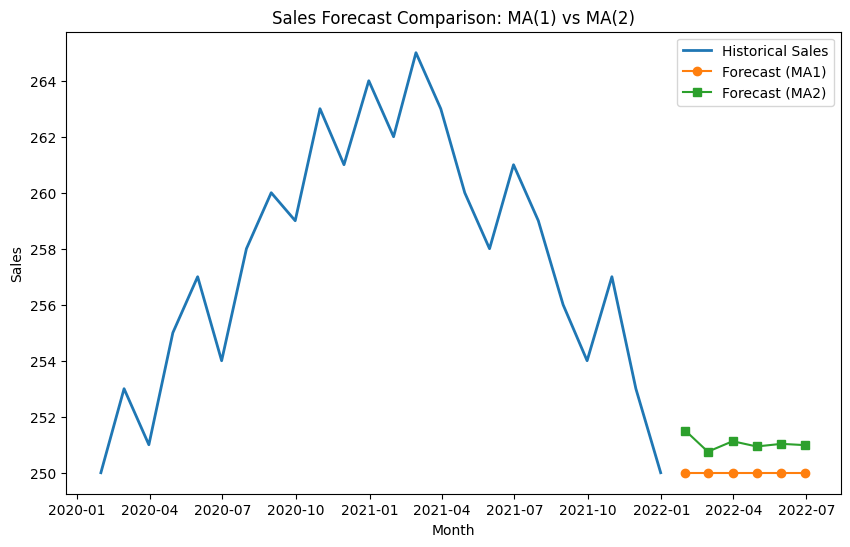

In [60]:
# Step 4: Compare MA(1) and MA(2) Forecasts
plt.figure(figsize=(10,6))
plt.plot(df.index, df["Sales"], label="Historical Sales", linewidth=2)
plt.plot(future_months, ma1_forecast, label="Forecast (MA1)", marker="o")
plt.plot(future_months, ma2_forecast, label="Forecast (MA2)", marker="s")
plt.title("Sales Forecast Comparison: MA(1) vs MA(2)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()
